In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Encounters
Table containing encounter information

In [73]:
encounters_df = pd.read_csv('../../Data/encounters.txt', delimiter = '|')
print(encounters_df.shape)
encounters_df = encounters_df[encounters_df['Age_y'] >= 18]
encounters_df.head()

(522, 17)


,EncounterKey,PatientKey,Sex,Age_y,BirthDate,PtAdmitDate,PtDischargeDate,DRG,FinancialClass,AdmissionOrigin,AdmissionSource,AdmissionType,PrimaryDx,PresentOnAdmissionDiagnosisComboKey,HospitalAcquiredDiagnosisComboKey,DischargeDisposition,DischargePatientClass
0,D009F2D78A0374,DB8B8E7C227264,Male,69,1954-06-13,2023-09-01,2023-09-26,PATHOLOGICAL FRACTURES AND MUSCULOSKELETAL AND...,Medicare,ED Admission,Self Referred (Home),Emergency,Secondary malignant neoplasm of bone (CMS code),4723681,-1,Deceased,Inpatient
1,D00F3A8D5F43B2,D51024504C9BE5,Male,24,1998-09-12,2023-09-02,2023-09-30,OTHER DIGESTIVE SYSTEM AND ABDOMINAL PROCEDURES,Covered California Medi-Cal,Transfer Center Admission,Transfer - Outside Emer Dept,Urgent,Secondary malignant neoplasm of retroperitoneu...,111736,-1,Home or Self Care,Inpatient
2,D01FCB9EFFD6D5,D47F8C6663B2AC,Male,53,1970-07-23,2023-08-27,2023-09-06,PERCUTANEOUS AND OTHER INTRACARDIAC PROCEDURES...,Blue Shield,Transfer Center Admission,Clinic Referral,Urgent,Typical atrial flutter (CMS code),-1,-1,Home or Self Care,Inpatient
3,D02DC627A3743A,DDC17BF3C6B1D9,Male,87,1935-10-15,2023-09-20,2023-09-22,OTHER DIGESTIVE SYSTEM DIAGNOSES WITH CC,Medicare,ED Admission,Self Referred (Home),Emergency,"Vascular disorder of intestine, unspecified (C...",-1,-1,Home Health Care (Non UCSF),Inpatient
4,D03868A75BBE62,DAE2BFBDAFD04C,Female,59,1964-04-06,2023-08-26,2023-09-11,SEPTICEMIA OR SEVERE SEPSIS WITHOUT MV >96 HOU...,United Health Care,ED Admission,Self Referred (Home),Emergency,Other specified sepsis (CMS code),-1,-1,Home or Self Care,Inpatient


In [74]:
encounters_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   EncounterKey                         522 non-null    object
 1   PatientKey                           522 non-null    object
 2   Sex                                  522 non-null    object
 3   Age_y                                522 non-null    int64 
 4   BirthDate                            522 non-null    object
 5   PtAdmitDate                          522 non-null    object
 6   PtDischargeDate                      522 non-null    object
 7   DRG                                  522 non-null    object
 8   FinancialClass                       522 non-null    object
 9   AdmissionOrigin                      522 non-null    object
 10  AdmissionSource                      522 non-null    object
 11  AdmissionType                        522 non-

In [75]:
print(f"The number of unique patients are: {encounters_df['PatientKey'].nunique()}")
print(f"The number of unique encounter keys are: {encounters_df['EncounterKey'].nunique()}")

The number of unique patients are: 520
The number of unique encounter keys are: 522


In [76]:
encounters_df['PatientKey'].value_counts()

PatientKey
D6E9DABAB25220    2
D1493B73F9549D    2
DB8B8E7C227264    1
DEF6EF8108CF7B    1
DE8E2492FC7764    1
                 ..
DF999788BA1D24    1
DB84A4E10D84B5    1
D745D32C1AC92D    1
D97F315164190F    1
DF5193D6E5EE62    1
Name: count, Length: 520, dtype: int64

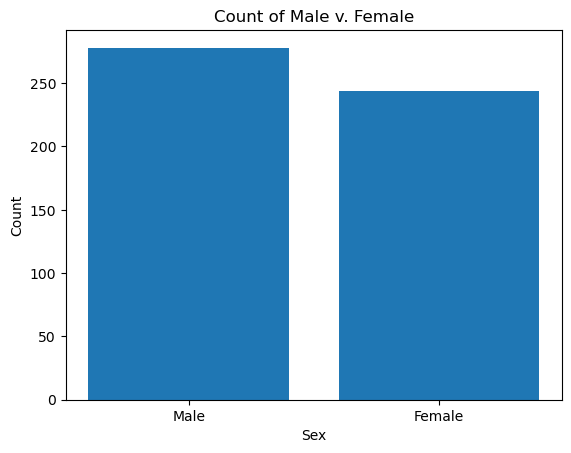

In [77]:
# distribution of sex
sex_dist = encounters_df["Sex"].value_counts()
plt.figure()
plt.bar(sex_dist.index, sex_dist)
plt.title('Count of Male v. Female')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.savefig('./figs/sex.png', transparent = True)
plt.show()

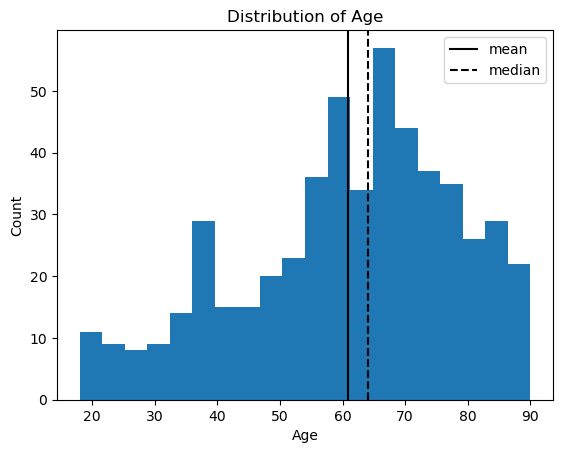

In [78]:
# distribution of age
plt.figure()
plt.hist(encounters_df['Age_y'], bins = 20)
plt.title('Distribution of Age')
plt.ylabel('Count')
plt.xlabel('Age')
plt.axvline(encounters_df['Age_y'].mean(), color = 'k', linestyle = '-', label = 'mean')
plt.axvline(encounters_df['Age_y'].median(), color = 'k', linestyle = '--', label = 'median')
plt.legend()
plt.savefig('./figs/age.png', transparent = True)
plt.show()

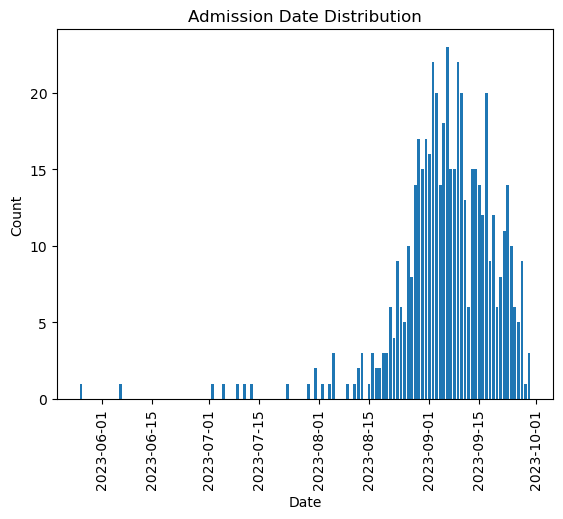

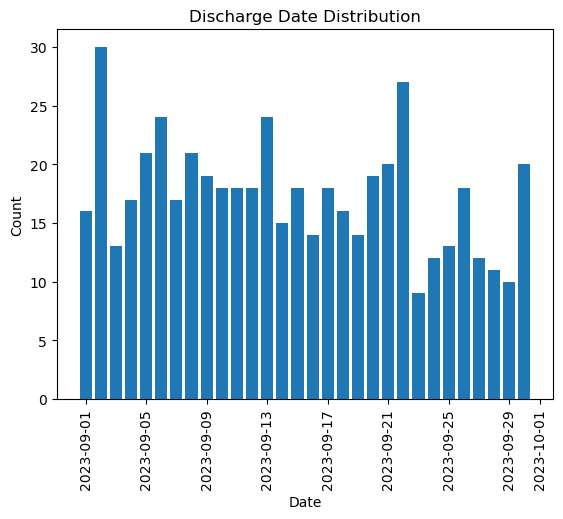

In [79]:
# patient admission date
encounters_df[['PtAdmitDate', 'PtDischargeDate']] = encounters_df[['PtAdmitDate', 'PtDischargeDate']].apply(pd.to_datetime, format = "%Y-%m-%d")

admission_date_counts = encounters_df['PtAdmitDate'].value_counts()
plt.figure()
plt.bar(admission_date_counts.index, admission_date_counts)
plt.xticks(rotation = 90)
plt.title('Admission Date Distribution')
plt.xlabel('Date')
plt.ylabel('Count')
plt.savefig('./figs/admission_date.png', transparent = True, dpi = 300, bbox_inches = "tight")
plt.show()

# patient discharge date
discharge_date_counts = encounters_df['PtDischargeDate'].value_counts()
plt.figure()
plt.bar(discharge_date_counts.index, discharge_date_counts)
plt.xticks(rotation = 90)
plt.title('Discharge Date Distribution')
plt.xlabel('Date')
plt.ylabel('Count')
plt.savefig('./figs/discharge_date.png', transparent = True, dpi = 300, bbox_inches = "tight")
plt.show()

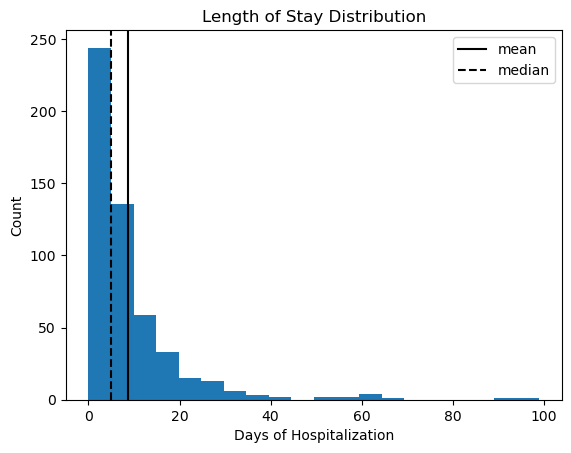

In [80]:
encounters_df['length_of_stay'] = encounters_df['PtDischargeDate'] - encounters_df['PtAdmitDate']
encounters_df['length_of_stay'] = encounters_df['length_of_stay'].apply(lambda x: x.days)
plt.figure()
plt.hist(encounters_df['length_of_stay'], bins = 20)
plt.title('Length of Stay Distribution')
plt.xlabel('Days of Hospitalization')
plt.ylabel('Count')
plt.axvline(encounters_df['length_of_stay'].mean(), color = 'k', linestyle = '-', label = 'mean')
plt.axvline(encounters_df['length_of_stay'].median(), color = 'k', linestyle = '--', label = 'median')
plt.legend()
plt.savefig('./figs/length_of_stay.png', transparent = True, dpi = 300, bbox_inches = "tight")
plt.show()


## DRG Classification

In [81]:
# unique counts of diagnosis-related group
encounters_df['DRG'].value_counts()

DRG
*Unspecified                                                                           24
SEPTICEMIA OR SEVERE SEPSIS WITHOUT MV >96 HOURS WITH MCC                              21
MAJOR HIP AND KNEE JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY WITHOUT MCC    15
OTHER CHEMOTHERAPY                                                                      9
KIDNEY TRANSPLANT                                                                       8
                                                                                       ..
MEDICAL BACK PROBLEMS WITH MCC                                                          1
INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION WITH MCC                                 1
COAGULATION DISORDERS                                                                   1
OTHER DISORDERS OF NERVOUS SYSTEM WITH MCC                                              1
SIGNS AND SYMPTOMS WITHOUT MCC                                                          1
Name: 

In [82]:
drg_df = pd.read_csv('drg_042023_092023.csv')
drg_df.head()

,DRG,MDC,MS,Description
0,1,NaN,P,HEART TRANSPLANT OR IMPLANT OF HEART ASSIST SY...
1,2,NaN,P,HEART TRANSPLANT OR IMPLANT OF HEART ASSIST SY...
2,3,NaN,P,ECMO OR TRACHEOSTOMY WITH MV >96 HOURS OR PRIN...
3,4,NaN,P,TRACHEOSTOMY WITH MV >96 HOURS OR PRINCIPAL DI...
4,5,NaN,P,LIVER TRANSPLANT WITH MCC OR INTESTINAL TRANSP...


In [83]:
encounters_df = pd.merge(encounters_df, drg_df, left_on = 'DRG', right_on = 'Description', how = "left")
encounters_df = encounters_df.rename(columns={'DRG_y': 'DRG_num', 'DRG_x': 'DRG_description'})
encounters_df.head()

,EncounterKey,PatientKey,Sex,Age_y,BirthDate,PtAdmitDate,PtDischargeDate,DRG_description,FinancialClass,AdmissionOrigin,...,PrimaryDx,PresentOnAdmissionDiagnosisComboKey,HospitalAcquiredDiagnosisComboKey,DischargeDisposition,DischargePatientClass,length_of_stay,DRG_num,MDC,MS,Description
0,D009F2D78A0374,DB8B8E7C227264,Male,69,1954-06-13,2023-09-01,2023-09-26,PATHOLOGICAL FRACTURES AND MUSCULOSKELETAL AND...,Medicare,ED Admission,...,Secondary malignant neoplasm of bone (CMS code),4723681,-1,Deceased,Inpatient,25,542.0,8.0,M,PATHOLOGICAL FRACTURES AND MUSCULOSKELETAL AND...
1,D00F3A8D5F43B2,D51024504C9BE5,Male,24,1998-09-12,2023-09-02,2023-09-30,OTHER DIGESTIVE SYSTEM AND ABDOMINAL PROCEDURES,Covered California Medi-Cal,Transfer Center Admission,...,Secondary malignant neoplasm of retroperitoneu...,111736,-1,Home or Self Care,Inpatient,28,NaN,NaN,NaN,NaN
2,D01FCB9EFFD6D5,D47F8C6663B2AC,Male,53,1970-07-23,2023-08-27,2023-09-06,PERCUTANEOUS AND OTHER INTRACARDIAC PROCEDURES...,Blue Shield,Transfer Center Admission,...,Typical atrial flutter (CMS code),-1,-1,Home or Self Care,Inpatient,10,273.0,5.0,P,PERCUTANEOUS AND OTHER INTRACARDIAC PROCEDURES...
3,D02DC627A3743A,DDC17BF3C6B1D9,Male,87,1935-10-15,2023-09-20,2023-09-22,OTHER DIGESTIVE SYSTEM DIAGNOSES WITH CC,Medicare,ED Admission,...,"Vascular disorder of intestine, unspecified (C...",-1,-1,Home Health Care (Non UCSF),Inpatient,2,394.0,6.0,M,OTHER DIGESTIVE SYSTEM DIAGNOSES WITH CC
4,D03868A75BBE62,DAE2BFBDAFD04C,Female,59,1964-04-06,2023-08-26,2023-09-11,SEPTICEMIA OR SEVERE SEPSIS WITHOUT MV >96 HOU...,United Health Care,ED Admission,...,Other specified sepsis (CMS code),-1,-1,Home or Self Care,Inpatient,16,871.0,18.0,M,SEPTICEMIA OR SEVERE SEPSIS WITHOUT MV >96 HOU...


In [84]:
encounters_df['MDC'] = encounters_df['MDC'].apply(lambda x: 'None' if pd.isna(x) else str(int(x)))
encounters_df.head()

,EncounterKey,PatientKey,Sex,Age_y,BirthDate,PtAdmitDate,PtDischargeDate,DRG_description,FinancialClass,AdmissionOrigin,...,PrimaryDx,PresentOnAdmissionDiagnosisComboKey,HospitalAcquiredDiagnosisComboKey,DischargeDisposition,DischargePatientClass,length_of_stay,DRG_num,MDC,MS,Description
0,D009F2D78A0374,DB8B8E7C227264,Male,69,1954-06-13,2023-09-01,2023-09-26,PATHOLOGICAL FRACTURES AND MUSCULOSKELETAL AND...,Medicare,ED Admission,...,Secondary malignant neoplasm of bone (CMS code),4723681,-1,Deceased,Inpatient,25,542.0,8,M,PATHOLOGICAL FRACTURES AND MUSCULOSKELETAL AND...
1,D00F3A8D5F43B2,D51024504C9BE5,Male,24,1998-09-12,2023-09-02,2023-09-30,OTHER DIGESTIVE SYSTEM AND ABDOMINAL PROCEDURES,Covered California Medi-Cal,Transfer Center Admission,...,Secondary malignant neoplasm of retroperitoneu...,111736,-1,Home or Self Care,Inpatient,28,NaN,None,NaN,NaN
2,D01FCB9EFFD6D5,D47F8C6663B2AC,Male,53,1970-07-23,2023-08-27,2023-09-06,PERCUTANEOUS AND OTHER INTRACARDIAC PROCEDURES...,Blue Shield,Transfer Center Admission,...,Typical atrial flutter (CMS code),-1,-1,Home or Self Care,Inpatient,10,273.0,5,P,PERCUTANEOUS AND OTHER INTRACARDIAC PROCEDURES...
3,D02DC627A3743A,DDC17BF3C6B1D9,Male,87,1935-10-15,2023-09-20,2023-09-22,OTHER DIGESTIVE SYSTEM DIAGNOSES WITH CC,Medicare,ED Admission,...,"Vascular disorder of intestine, unspecified (C...",-1,-1,Home Health Care (Non UCSF),Inpatient,2,394.0,6,M,OTHER DIGESTIVE SYSTEM DIAGNOSES WITH CC
4,D03868A75BBE62,DAE2BFBDAFD04C,Female,59,1964-04-06,2023-08-26,2023-09-11,SEPTICEMIA OR SEVERE SEPSIS WITHOUT MV >96 HOU...,United Health Care,ED Admission,...,Other specified sepsis (CMS code),-1,-1,Home or Self Care,Inpatient,16,871.0,18,M,SEPTICEMIA OR SEVERE SEPSIS WITHOUT MV >96 HOU...


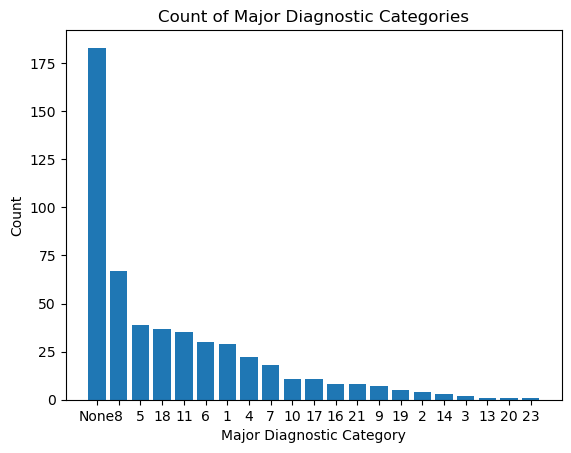

In [85]:
# MDC distribution
mdc_count = encounters_df['MDC'].value_counts()
plt.figure()
plt.bar(mdc_count.index, mdc_count)
plt.title('Count of Major Diagnostic Categories')
plt.xlabel('Major Diagnostic Category')
plt.ylabel('Count')
plt.savefig('./figs/mdc.png', transparent = True)
plt.show()

In [86]:
encounters_df['DRG_description'].value_counts()

DRG_description
*Unspecified                                                                           24
SEPTICEMIA OR SEVERE SEPSIS WITHOUT MV >96 HOURS WITH MCC                              21
MAJOR HIP AND KNEE JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY WITHOUT MCC    15
OTHER CHEMOTHERAPY                                                                      9
KIDNEY TRANSPLANT                                                                       8
                                                                                       ..
MEDICAL BACK PROBLEMS WITH MCC                                                          1
INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION WITH MCC                                 1
COAGULATION DISORDERS                                                                   1
OTHER DISORDERS OF NERVOUS SYSTEM WITH MCC                                              1
SIGNS AND SYMPTOMS WITHOUT MCC                                                      

## Insurance

In [87]:
# unique financial class (insurance)
encounters_df['FinancialClass'].unique()

array(['Medicare', 'Covered California Medi-Cal', 'Blue Shield',
       'United Health Care', 'Blue Cross', 'Medi-Cal Managed Care',
       'Medicare Advantage HMO/Senior', 'Partnership Managed Medi-Cal',
       'Other Government',
       'Partnership Covered California Managed Medi-Cal',
       'Alameda Alliance Managed Medi-Cal', 'HealthNet', 'Cigna',
       'Kaiser', 'Commercial', 'Covered California', 'Capitation',
       'Medi-Cal Standard', 'Medicare Advantage', 'Aetna', 'Self-Pay',
       'Capitation Senior',
       'Alameda Alliance Covered California Managed Medi-Cal',
       "Worker's Comp"], dtype=object)

## Admission Type

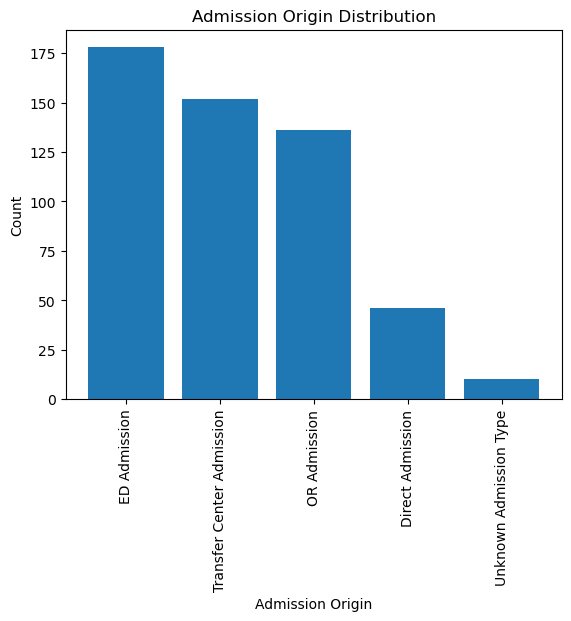

In [88]:
# patient admission origin
admission_origin_count = encounters_df['AdmissionOrigin'].value_counts()
plt.figure()
plt.bar(admission_origin_count.index, admission_origin_count)
plt.title('Admission Origin Distribution')
plt.ylabel('Count')
plt.xlabel('Admission Origin')
plt.xticks(rotation = 90)
plt.savefig('./figs/admission_origin.png', transparent = True, dpi = 300, bbox_inches = "tight")
plt.show()

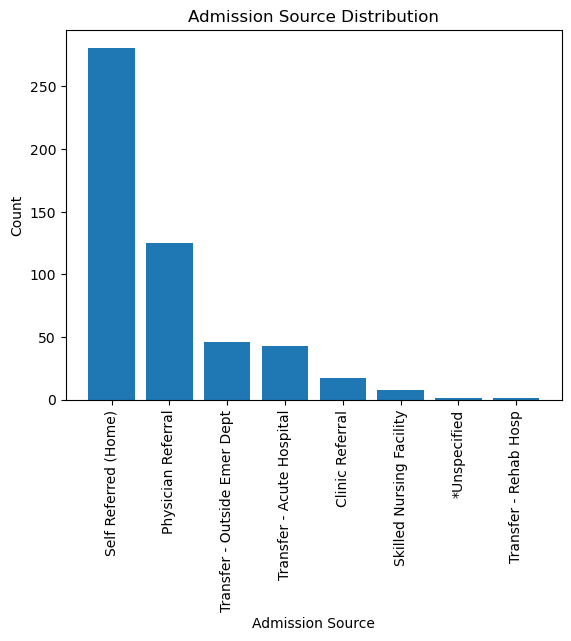

In [89]:
# patient admission source
admission_source_count = encounters_df['AdmissionSource'].value_counts()
plt.figure()
plt.bar(admission_source_count.index, admission_source_count)
plt.title('Admission Source Distribution')
plt.ylabel('Count')
plt.xlabel('Admission Source')
plt.xticks(rotation = 90)
plt.savefig('./figs/admission_source.png', transparent = True, dpi = 300, bbox_inches = "tight")
plt.show()

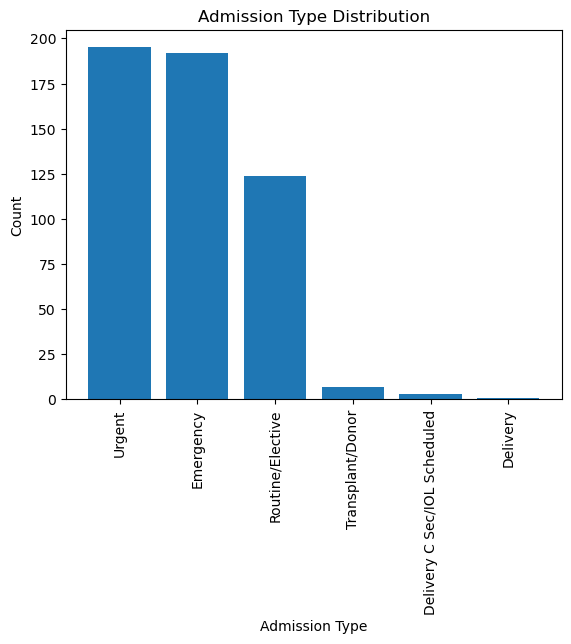

In [90]:
# patient admission type
admission_type_count = encounters_df['AdmissionType'].value_counts()
plt.figure()
plt.bar(admission_type_count.index, admission_type_count)
plt.title('Admission Type Distribution')
plt.ylabel('Count')
plt.xlabel('Admission Type')
plt.xticks(rotation = 90)
plt.savefig('./figs/admission_type.png', transparent = True, dpi = 400, bbox_inches = "tight")
plt.show()

## Diagnosis Types

In [91]:
encounters_df['PrimaryDx'].unique()

array(['Secondary malignant neoplasm of bone  (CMS code)',
       'Secondary malignant neoplasm of retroperitoneum and peritoneum  (CMS code)',
       'Typical atrial flutter  (CMS code)',
       'Vascular disorder of intestine, unspecified (CMS code)',
       'Other specified sepsis  (CMS code)',
       'Unilateral primary osteoarthritis, left knee',
       'Labor and delivery complicated by vasa previa, not applicable or unspecified',
       'Other complications of liver transplant  (CMS code)',
       'Malignant neoplasm of right lacrimal gland and duct  (CMS code)',
       'Alcoholic cirrhosis of liver with ascites  (CMS code)',
       'Type 2 diabetes mellitus with diabetic chronic kidney disease  (CMS code)',
       'Angiodysplasia of colon with hemorrhage',
       'Malignant melanoma of overlapping sites of skin  (CMS code)',
       'Other complications of other transplanted tissue',
       'Spondylolisthesis, lumbosacral region',
       'Atherosclerotic heart disease of native 

In [92]:
# diagnosis combo keys
encounters_df['PresentOnAdmissionDiagnosisComboKey'].unique()

array([ 4723681,   111736,       -1, 27227372, 28154792,   301555,
        1854984,   124480, 27428154, 27066813, 27532955,  1308916,
       25859107, 27898590, 22642387, 27928768,   411704, 27019646,
         224411,  1680199, 26943000,  5738063,  1405835, 27051514,
        1461964, 10920448, 27910754,  4824839, 26605942, 26744915,
       10689609,  3925670, 28007903,  1613930, 28036959, 27600924,
       27596770, 27534457, 27456413,  1029141,  3938236, 28371727,
       28162862,   525844,  1848960, 27277664,   800378, 26952762,
        6595623, 28371337, 27033912,  5727853, 26939430,  4950022,
        1866461, 28081933, 27458733, 27494223, 27295160, 27599848,
         828507, 16185268,  1216170, 27544093,  1597217, 27981291,
       27739619, 27209237,  4657086, 27388390, 26945994, 27319559,
       27768607, 27380489,   347409, 27457658, 28014637, 26901358,
       27519886, 26757381,  1078773, 26863054, 28085899, 26721719,
       22571274, 19962932,  1293107, 28166428,  1302356,   638

In [93]:
# diagnosis combo keys
encounters_df['HospitalAcquiredDiagnosisComboKey'].unique()

array([      -1,  1628690,   596819,  1844305,  1716000, 18696409,
        4716227, 27520393,  1453511, 26934463,  1404574, 27572782,
        3668512, 21675435, 26953019,  3873249, 27565785, 26075603,
       27174338, 27635581,  1308916,  2441459])

## Discharge Type

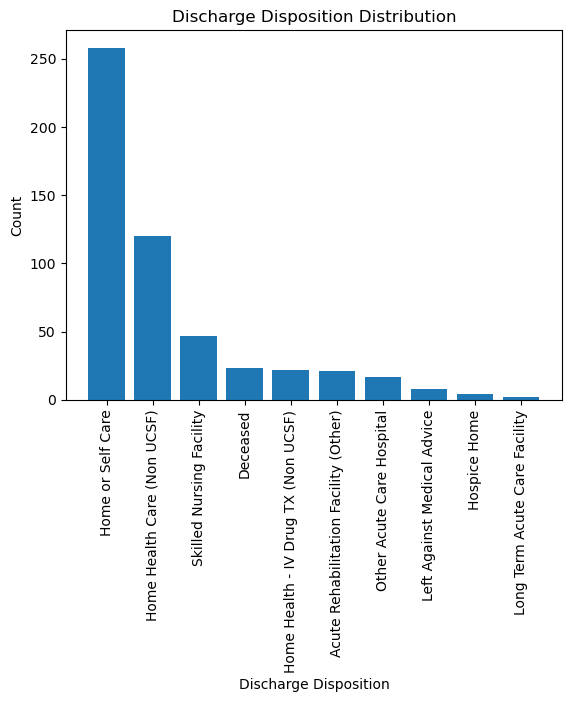

In [94]:
# patient discharge disposition
discharge_disposition_count = encounters_df['DischargeDisposition'].value_counts()
plt.figure()
plt.bar(discharge_disposition_count.index, discharge_disposition_count)
plt.title('Discharge Disposition Distribution')
plt.ylabel('Count')
plt.xlabel('Discharge Disposition')
plt.xticks(rotation = 90)
plt.savefig('./figs/discharge_disposition.png', transparent = True, dpi = 300, bbox_inches = "tight")
plt.show()

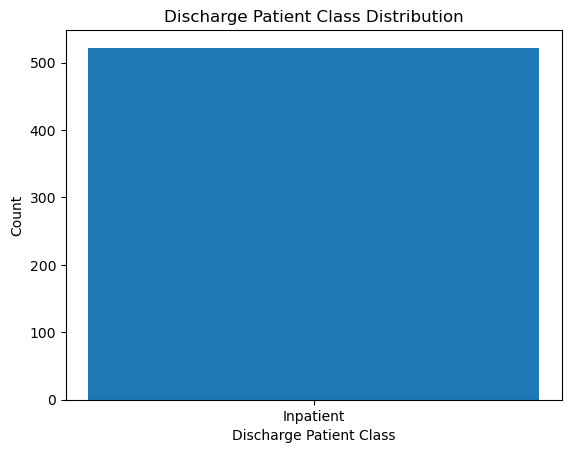

In [95]:
# patient discharge class
discharge_class_count = encounters_df['DischargePatientClass'].value_counts()
plt.figure()
plt.bar(discharge_class_count.index, discharge_class_count)
plt.title('Discharge Patient Class Distribution')
plt.ylabel('Count')
plt.xlabel('Discharge Patient Class')
plt.savefig('./figs/discharge_class.png', transparent = True, dpi = 300, bbox_inches = "tight")
plt.show()

In [96]:
# subset of the encounters_df
encounters_df_subset = encounters_df[['EncounterKey', 'PatientKey', 'Sex', 'Age_y', 'length_of_stay',
                                      'DRG_description', 'PrimaryDx', 'PresentOnAdmissionDiagnosisComboKey', 'HospitalAcquiredDiagnosisComboKey']]

# Present on Admission Diagnosis

In [97]:
unique_encounters = encounters_df['EncounterKey'].unique()
present_on_admit_df = pd.read_csv('../../Data/presentOnAdmitDx.txt', delimiter= "|")
present_on_admit_df_filtered = present_on_admit_df[present_on_admit_df['EncounterKey'].isin(unique_encounters)]
present_on_admit_df_filtered.head()

,EncounterKey,DxName
1,D009F2D78A0374,Complains of low back pain
3,D00F3A8D5F43B2,Germ cell tumor (CMS code)
4,D00F3A8D5F43B2,Retroperitoneal mass
13,D01FCB9EFFD6D5,*Unspecified
39,D02DC627A3743A,*Unspecified


In [98]:
present_on_admit_df['EncounterKey'].nunique()

1303

In [99]:
print(f"The number of instances of the non-filtered dataframe: {len(present_on_admit_df)}")
print(f"The number of instances of the filtered dataframe: {len(present_on_admit_df_filtered)}")

The number of instances of the non-filtered dataframe: 1970
The number of instances of the filtered dataframe: 801


In [100]:
present_on_admit_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 801 entries, 1 to 1966
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   EncounterKey  801 non-null    object
 1   DxName        801 non-null    object
dtypes: object(2)
memory usage: 18.8+ KB


In [101]:
admission_dx_df = pd.merge(encounters_df_subset, present_on_admit_df_filtered, how = "left", on = "EncounterKey")
admission_dx_df.head()

,EncounterKey,PatientKey,Sex,Age_y,length_of_stay,DRG_description,PrimaryDx,PresentOnAdmissionDiagnosisComboKey,HospitalAcquiredDiagnosisComboKey,DxName
0,D009F2D78A0374,DB8B8E7C227264,Male,69,25,PATHOLOGICAL FRACTURES AND MUSCULOSKELETAL AND...,Secondary malignant neoplasm of bone (CMS code),4723681,-1,Complains of low back pain
1,D00F3A8D5F43B2,D51024504C9BE5,Male,24,28,OTHER DIGESTIVE SYSTEM AND ABDOMINAL PROCEDURES,Secondary malignant neoplasm of retroperitoneu...,111736,-1,Germ cell tumor (CMS code)
2,D00F3A8D5F43B2,D51024504C9BE5,Male,24,28,OTHER DIGESTIVE SYSTEM AND ABDOMINAL PROCEDURES,Secondary malignant neoplasm of retroperitoneu...,111736,-1,Retroperitoneal mass
3,D01FCB9EFFD6D5,D47F8C6663B2AC,Male,53,10,PERCUTANEOUS AND OTHER INTRACARDIAC PROCEDURES...,Typical atrial flutter (CMS code),-1,-1,*Unspecified
4,D02DC627A3743A,DDC17BF3C6B1D9,Male,87,2,OTHER DIGESTIVE SYSTEM DIAGNOSES WITH CC,"Vascular disorder of intestine, unspecified (C...",-1,-1,*Unspecified


# Hospital Acquired Diagnosis
Diagnosis during hospitalization

In [102]:
hospital_acquired_dx_df = pd.read_csv('../../Data/hospitalAcquiredDx.txt', delimiter = "|")
hospital_acquired_dx_df_filtered = hospital_acquired_dx_df[hospital_acquired_dx_df['EncounterKey'].isin(unique_encounters)]
hospital_acquired_dx_df.head()

,EncounterKey,DxName
0,D00142C614FA25,*Unspecified
1,D009F2D78A0374,*Unspecified
2,D00D7335431B1F,*Unspecified
3,D00F3A8D5F43B2,*Unspecified
4,D0105B1196D03B,*Unspecified


In [103]:
hospital_acquired_dx_df['EncounterKey'].nunique()

1303

In [104]:
print(f"The number of instances of the non-filtered dataframe: {len(hospital_acquired_dx_df)}")
print(f"The number of instances of the filtered dataframe: {len(hospital_acquired_dx_df_filtered)}")

The number of instances of the non-filtered dataframe: 1356
The number of instances of the filtered dataframe: 569


In [105]:
hospitalization_dx_df = pd.merge(encounters_df_subset, hospital_acquired_dx_df_filtered, how = "left", on = "EncounterKey")
hospitalization_dx_df.head()

,EncounterKey,PatientKey,Sex,Age_y,length_of_stay,DRG_description,PrimaryDx,PresentOnAdmissionDiagnosisComboKey,HospitalAcquiredDiagnosisComboKey,DxName
0,D009F2D78A0374,DB8B8E7C227264,Male,69,25,PATHOLOGICAL FRACTURES AND MUSCULOSKELETAL AND...,Secondary malignant neoplasm of bone (CMS code),4723681,-1,*Unspecified
1,D00F3A8D5F43B2,D51024504C9BE5,Male,24,28,OTHER DIGESTIVE SYSTEM AND ABDOMINAL PROCEDURES,Secondary malignant neoplasm of retroperitoneu...,111736,-1,*Unspecified
2,D01FCB9EFFD6D5,D47F8C6663B2AC,Male,53,10,PERCUTANEOUS AND OTHER INTRACARDIAC PROCEDURES...,Typical atrial flutter (CMS code),-1,-1,*Unspecified
3,D02DC627A3743A,DDC17BF3C6B1D9,Male,87,2,OTHER DIGESTIVE SYSTEM DIAGNOSES WITH CC,"Vascular disorder of intestine, unspecified (C...",-1,-1,*Unspecified
4,D03868A75BBE62,DAE2BFBDAFD04C,Female,59,16,SEPTICEMIA OR SEVERE SEPSIS WITHOUT MV >96 HOU...,Other specified sepsis (CMS code),-1,-1,*Unspecified


# Orders

In [106]:
orders_df = pd.read_csv('../../Data/orders.txt', delimiter = "|")
orders_df_filtered = orders_df[orders_df['EncounterKey'].isin(unique_encounters)]
orders_df_filtered.head()

,EncounterKey,PatientKey,MedicationOrderKey,OrderDate,OrderName,Frequency,Sig,Quantity,QuantityUnit,DurationDays,...,Class,Source,DischargeOrder,Name,PharmaceuticalClass,PharmaceuticalSubclass,TherapeuticClass,AssociatedDiagnosisComboKey,AuthorizedByProviderKey,OrderDx
0,D009F2D78A0374,DB8B8E7C227264,D5A3C242B16791,2023-09-01,lansoprazole (PREVACID SOLUTAB) rapid dissolve...,2 times daily,*Not Applicable,NaN,*Not Applicable,25.0,...,Normal,Manage Orders,0,"LANSOPRAZOLE 15 MG DELAYED RELEASE,DISINTEGRAT...",PROTON-PUMP INHIBITORS,Gastric Acid Secretion Reducer - Proton Pump I...,GASTROINTESTINAL,-1,1048389,*Unspecified
1,D00F3A8D5F43B2,DC58231891F54A,D2A2C94480B539,2023-09-30,lansoprazole (PREVACID) capsule 30 mg,Every Morning Before Breakfast Scheduled,*Not Applicable,NaN,*Not Applicable,NaN,...,Normal,Manage Orders,0,"LANSOPRAZOLE 30 MG CAPSULE,DELAYED RELEASE",PROTON-PUMP INHIBITORS,Gastric Acid Secretion Reducer - Proton Pump I...,GASTROINTESTINAL,-1,784989,*Unspecified
2,D00F3A8D5F43B2,DC58231891F54A,D9031523D8AC0A,2023-09-30,lansoprazole (PREVACID) 30 mg capsule,Every Morning Before Breakfast Scheduled,DEID:D5154E2D98274C,60.0,capsule,NaN,...,Normal,Ord Rec Discharge Review Orders,1,"LANSOPRAZOLE 30 MG CAPSULE,DELAYED RELEASE",PROTON-PUMP INHIBITORS,Gastric Acid Secretion Reducer - Proton Pump I...,GASTROINTESTINAL,-1,784989,*Unspecified
3,D00F3A8D5F43B2,DC58231891F54A,D9F5CCF4A84F71,2023-09-19,pantoprazole (PROTONIX) injection 40 mg,Daily Scheduled,*Not Applicable,NaN,*Not Applicable,11.0,...,Normal,Manage Orders,0,PANTOPRAZOLE 40 MG INTRAVENOUS SOLUTION,PROTON-PUMP INHIBITORS,Gastric Acid Secretion Reducer - Proton Pump I...,GASTROINTESTINAL,-1,788285,*Unspecified
4,D01FCB9EFFD6D5,D6878B787D62F0,D057AC8B89333D,2023-09-01,lansoprazole (PREVACID) capsule 15 mg,Every Morning Before Breakfast Scheduled,*Not Applicable,NaN,*Not Applicable,5.0,...,Normal,Manage Orders,0,"LANSOPRAZOLE 15 MG CAPSULE,DELAYED RELEASE",PROTON-PUMP INHIBITORS,Gastric Acid Secretion Reducer - Proton Pump I...,GASTROINTESTINAL,-1,782934,*Unspecified


In [107]:
print(f"The number of instances of the non-filtered dataframe: {len(orders_df)}")
print(f"The number of instances of the filtered dataframe: {len(orders_df_filtered)}")

The number of instances of the non-filtered dataframe: 1059
The number of instances of the filtered dataframe: 1059


In [108]:
orders_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   EncounterKey                 1059 non-null   object 
 1   PatientKey                   1059 non-null   object 
 2   MedicationOrderKey           1059 non-null   object 
 3   OrderDate                    1036 non-null   object 
 4   OrderName                    1059 non-null   object 
 5   Frequency                    1059 non-null   object 
 6   Sig                          1012 non-null   object 
 7   Quantity                     163 non-null    float64
 8   QuantityUnit                 1059 non-null   object 
 9   DurationDays                 874 non-null    float64
 10  Mode                         1059 non-null   object 
 11  Class                        1059 non-null   object 
 12  Source                       1059 non-null   object 
 13  DischargeOrder    

In [109]:
# the number of unique patient keys here are different than the Encounters table
orders_df_filtered['PatientKey'].nunique()

730

In [110]:
# all medication order keys are unique
orders_df_filtered['MedicationOrderKey'].nunique()

1059

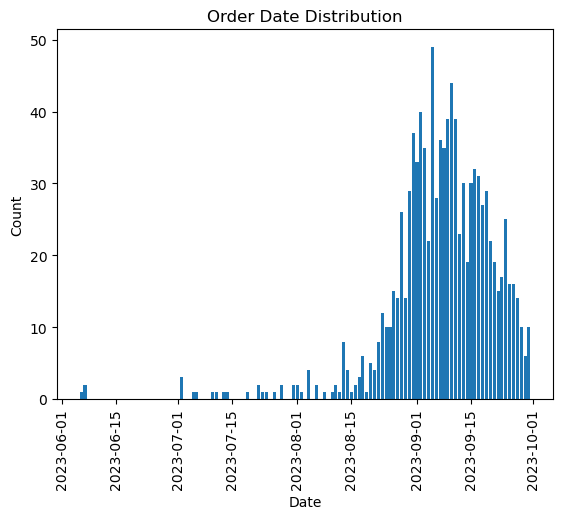

In [111]:
# order date - looking at the span
orders_df_filtered['OrderDate'] = orders_df_filtered['OrderDate'].apply(pd.to_datetime, format = "%Y-%m-%d")
order_date_count = orders_df_filtered['OrderDate'].value_counts()
plt.figure()
plt.bar(order_date_count.index, order_date_count)
plt.title('Order Date Distribution')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation = 90 )
plt.show()


In [112]:
# order name distribution
orders_df_filtered['OrderName'].value_counts()

OrderName
lansoprazole (PREVACID) capsule 30 mg                           401
pantoprazole (PROTONIX) injection 40 mg                         195
lansoprazole (PREVACID SOLUTAB) rapid dissolve tablet 30 mg     105
lansoprazole (PREVACID) 30 mg capsule                            78
omeprazole (PRILOSEC) 20 mg capsule                              62
lansoprazole (PREVACID) capsule 15 mg                            56
pantoprazole (PROTONIX) 40 mg tablet                             33
pantoprazole (PROTONIX) injection 80 mg                          30
omeprazole (PRILOSEC) 40 mg capsule                              26
lansoprazole (PREVACID SOLUTAB) rapid dissolve tablet 15 mg      19
lansoprazole (PREVACID SOLUTAB) 30 mg rapid dissolve tablet      16
lansoprazole (PREVACID) 15 mg capsule                             9
pantoprazole (PROTONIX) 20 mg tablet                              7
pantoprazole (PROTONIX) 4 mg/mL injection                         4
pantoprazole (PROTONIX) injection 20 m

In [113]:
# orders frequency
orders_df_filtered['Frequency'].value_counts()

Frequency
Every Morning Before Breakfast Scheduled    478
Daily Scheduled                             308
2 Times Daily Scheduled                     115
2 times daily                                84
Once                                         37
2 Times Daily Before Meals Scheduled         15
*Unspecified                                  4
Daily                                         3
2 Times Daily                                 3
Every Morning Scheduled                       3
Every 12 Hours                                2
2 Times Daily With Meals Scheduled            2
Twice Daily                                   1
Bedtime PRN                                   1
2 Times Daily PRN                             1
Once PRN                                      1
Daily PRN                                     1
Name: count, dtype: int64

In [114]:
# order quantity
orders_df_filtered['Quantity'].value_counts()

Quantity
30.0     109
60.0      24
90.0       9
14.0       5
120.0      3
1.0        3
180.0      2
200.0      1
6.0        1
32.0       1
15.0       1
56.0       1
110.0      1
42.0       1
100.0      1
Name: count, dtype: int64

In [115]:
# order mode
orders_df_filtered['Mode'].value_counts()

Mode
Inpatient     812
Outpatient    247
Name: count, dtype: int64

In [116]:
# order class
orders_df_filtered['Class'].value_counts()

Class
Normal            965
Historical Med     62
No Print           31
Print               1
Name: count, dtype: int64

In [117]:
#order source
orders_df_filtered['Source'].value_counts()

Source
Manage Orders                      413
Ord Rec Admission Reorder PTA      146
Ord Rec Discharge Review Orders    125
Ord Rec PreTransfer New Orders      80
Modify from Manage Orders           79
Ord Rec Discharge New Orders        66
*Unspecified                        40
Ord Rec Admission New Orders        35
Ord Rec PreTransfer Reorder         32
Ord Rec Admission Review PTA        29
Haiku                               11
Medication List                      2
Modify from Rx Sidebar               1
Name: count, dtype: int64

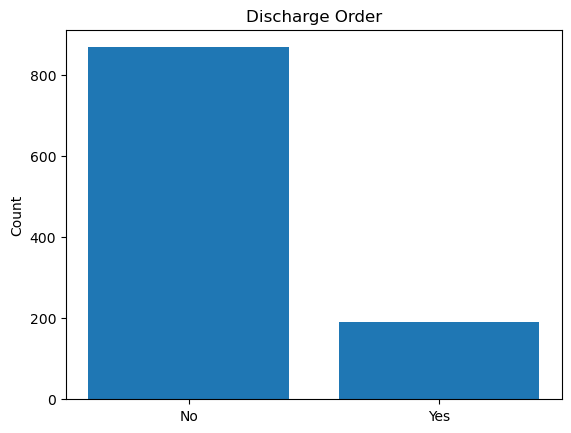

In [118]:
#order discharge
discharge_order_yn = orders_df_filtered['DischargeOrder'].map({0: "No", 1: "Yes"})
discharge_order_yn = discharge_order_yn.value_counts()
plt.figure()
plt.bar(discharge_order_yn.index, discharge_order_yn)
plt.title('Discharge Order')
plt.ylabel('Count')
plt.savefig('./figs/discharge_order.png', transparent = True, dpi = 300, bbox_inches = "tight")
plt.show()

In [119]:
# order pharmaceutical class
orders_df_filtered['PharmaceuticalClass'].value_counts()

PharmaceuticalClass
PROTON-PUMP INHIBITORS    1059
Name: count, dtype: int64

In [120]:
# order pharmaceutical subclass
orders_df_filtered['PharmaceuticalSubclass'].value_counts()

PharmaceuticalSubclass
Gastric Acid Secretion Reducer - Proton Pump Inhibitors (PPIs)    1059
Name: count, dtype: int64

In [121]:
# order therapeutic class
orders_df_filtered['TherapeuticClass'].value_counts()

TherapeuticClass
GASTROINTESTINAL    1059
Name: count, dtype: int64

In [122]:
# order therapeutic class
orders_df_filtered['OrderDx'].value_counts()

OrderDx
*Unspecified                                                                                                                                                                    985
Gastroesophageal reflux disease, unspecified whether esophagitis present                                                                                                          4
Lumbar radiculopathy                                                                                                                                                              3
Periprosthetic fracture around internal prosthetic right knee joint, initial encounter                                                                                            2
Malignant germ cell tumor of left ovary (CMS code)                                                                                                                                2
Aplastic anemia (CMS code)                                                                  

# Note Concepts
Only available at UCSF

In [123]:
note_concepts_df = pd.read_csv('../../Data/noteConcepts.txt', delimiter = "|")
note_concepts_df_filtered = note_concepts_df[note_concepts_df['EncounterKey'].isin(unique_encounters)]
note_concepts_df_filtered.head()

,deid_note_key,EncounterKey,domain,confidence,canon_text
32,D0009A32261D11,DE8E27F3F96434,signs and symptoms,1.0,abnormality
33,D0009A32261D11,DE8E27F3F96434,labs,1.0,Complete Blood Count
34,D0009A32261D11,DE8E27F3F96434,procedures,1.0,Complete Blood Count
35,D0009A32261D11,DE8E27F3F96434,procedures,1.0,Interventional procedure
36,D000B13A603105,DAF531C901EAE5,signs and symptoms,1.0,Icterus


In [124]:
note_concepts_df['EncounterKey'].nunique()

885

In [125]:
note_concepts_df['domain'].unique()

array(['signs and symptoms', 'medications', 'diseases', 'labs',
       'procedures'], dtype=object)

In [126]:
print(f"The number of instances of the non-filtered dataframe: {len(note_concepts_df)}")
print(f"The number of instances of the filtered dataframe: {len(note_concepts_df_filtered)}")

The number of instances of the non-filtered dataframe: 1523562
The number of instances of the filtered dataframe: 907492


In [127]:
note_concepts_df_filtered['domain'].unique()

array(['signs and symptoms', 'labs', 'procedures', 'medications',
       'diseases'], dtype=object)

In [128]:
note_concepts_df_filtered[note_concepts_df_filtered['deid_note_key'] == 'D00099A1236567']

,deid_note_key,EncounterKey,domain,confidence,canon_text


# Note Text

In [129]:
note_text_df = pd.read_csv('../../Data/noteText.csv')
note_text_df_filtered = note_text_df[note_text_df['EncounterKey'].isin(unique_encounters)].reset_index()
note_text_df_filtered.head()

,index,deid_note_key,EncounterKey,NoteDate,DepartmentSpecialty,ProviderSpecialty,ProviderType,NoteText
0,0,D00010F0E618AD,D304C167A23716,2023-09-15,Inpatient Nursing,NaN,Occupational Therapist,OCCUPATIONAL THERAPY CANCELED SESSION NOTE ...
1,1,D00015E35CE5B7,DD27EC809E2A28,2023-08-25,Inpatient Nursing,UCSF,Resident,History of cardiomyopathy presumed secondary t...
2,2,D000253FB63C7E,D054778440C77A,2023-09-10,Inpatient Nursing,General Surgery,Physician,Procedure(s) (LRB): KIDNEY TRANSPLANT CADAVER...
3,3,D0004A42F6443B,D8277269D1C037,2023-08-31,Inpatient Nursing,UCSF,Resident,NEUROSURGERY PROGRESS NOTE Hospital Course...
4,4,D0005D9BF5CAF1,D5A083F15D8290,2023-09-09,Inpatient Nursing,Nephrology,Physician,TRANSPLANT NEPHROLOGY PROGRESS NOTE Date of...


In [130]:
print(f"The number of instances of the non-filtered dataframe: {len(note_text_df)}")
print(f"The number of instances of the filtered dataframe: {len(note_text_df_filtered)}")

The number of instances of the non-filtered dataframe: 31216
The number of instances of the filtered dataframe: 31216


In [131]:
note_text_df['EncounterKey'].nunique()

522

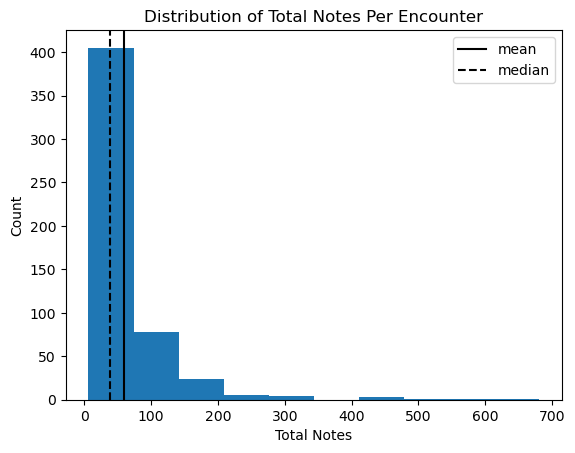

In [132]:
total_notes_dist = note_text_df_filtered['EncounterKey'].value_counts()
plt.figure()
plt.hist(total_notes_dist)
plt.title('Distribution of Total Notes Per Encounter')
plt.ylabel('Count')
plt.xlabel('Total Notes')
plt.axvline(total_notes_dist.mean(), color = 'k', label = 'mean')
plt.axvline(total_notes_dist.median(), color = 'k', linestyle = '--', label = 'median')
plt.legend()
plt.savefig('./figs/notes_text_dist.png', transparent = True, dpi = 300, bbox_inches = "tight")
plt.show()

In [133]:
total_notes_dist = total_notes_dist.reset_index()
total_notes_dist.rename(columns={"count": "notes_count"}, inplace=True)

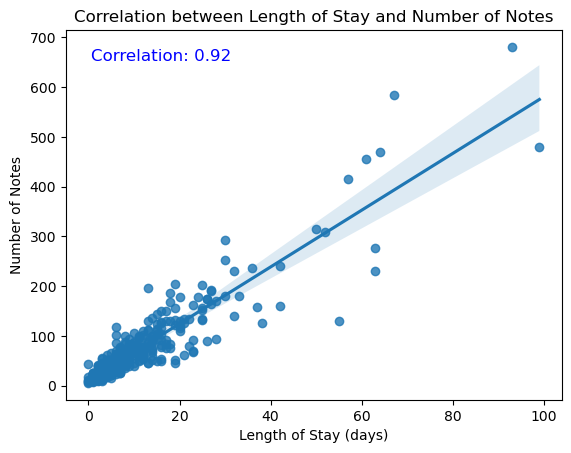

In [134]:
encounters_notes = pd.merge(encounters_df, total_notes_dist, on= 'EncounterKey')
notes_stay_corr = encounters_notes['length_of_stay'].corr(encounters_notes['notes_count'])
sns.regplot(x='length_of_stay', y='notes_count', data=encounters_notes)
plt.title('Correlation between Length of Stay and Number of Notes')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Number of Notes')
plt.annotate(f'Correlation: {notes_stay_corr:.2f}', xy=(0.05, 0.95), xycoords='axes fraction',
             fontsize=12, color='blue', ha='left', va='top')
plt.savefig('./figs/notes_text_corr.png', transparent = True, dpi = 300, bbox_inches = "tight")
plt.show()

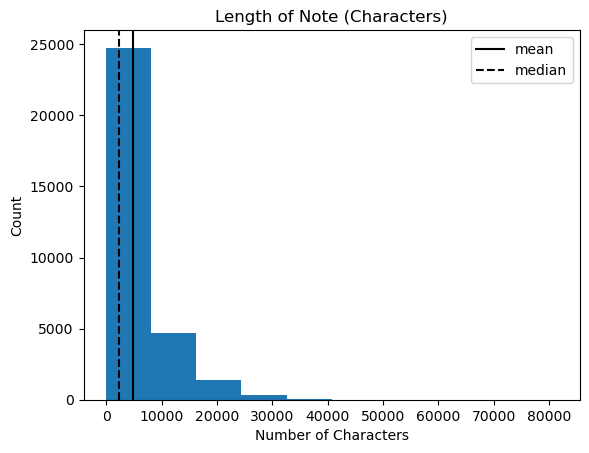

In [135]:
note_text_df_filtered['note_length'] = note_text_df_filtered['NoteText'].apply(lambda x: len(str(x)))
plt.figure()
plt.hist(note_text_df_filtered['note_length'])
plt.title('Length of Note (Characters)')
plt.xlabel('Number of Characters')
plt.ylabel('Count')
plt.axvline(note_text_df_filtered['note_length'].mean(), color = 'k', label = 'mean')
plt.axvline(note_text_df_filtered['note_length'].median(), color = 'k', linestyle = '--', label = 'median')
plt.legend()
plt.savefig('./figs/notes_len_char.png', transparent = True, dpi = 300, bbox_inches = "tight")
plt.show()

In [136]:
import re

def clean_text(text):
    clean_text = re.sub(r'[^\w\s/():]', '', text) # removes anything that is not alphanumerical or underscore
    clean_text = clean_text.replace('\n', ' ').replace('\t', ' ') # replaces new lines and tabs
    clean_text = re.sub(r'[-–—]', '-', clean_text) # replaces hyphens with one
    clean_text = ' '.join(clean_text.split()) # remove additional whitespaces
    return clean_text

note_text_df_filtered['clean_NoteText'] = note_text_df_filtered['NoteText'].apply(clean_text)
note_text_df_filtered.head()


,index,deid_note_key,EncounterKey,NoteDate,DepartmentSpecialty,ProviderSpecialty,ProviderType,NoteText,note_length,clean_NoteText
0,0,D00010F0E618AD,D304C167A23716,2023-09-15,Inpatient Nursing,NaN,Occupational Therapist,OCCUPATIONAL THERAPY CANCELED SESSION NOTE ...,310,OCCUPATIONAL THERAPY CANCELED SESSION NOTE OT ...
1,1,D00015E35CE5B7,DD27EC809E2A28,2023-08-25,Inpatient Nursing,UCSF,Resident,History of cardiomyopathy presumed secondary t...,335,History of cardiomyopathy presumed secondary t...
2,2,D000253FB63C7E,D054778440C77A,2023-09-10,Inpatient Nursing,General Surgery,Physician,Procedure(s) (LRB): KIDNEY TRANSPLANT CADAVER...,1019,Procedure(s) (LRB): KIDNEY TRANSPLANT CADAVERI...
3,3,D0004A42F6443B,D8277269D1C037,2023-08-31,Inpatient Nursing,UCSF,Resident,NEUROSURGERY PROGRESS NOTE Hospital Course...,2550,NEUROSURGERY PROGRESS NOTE Hospital Course Aug...
4,4,D0005D9BF5CAF1,D5A083F15D8290,2023-09-09,Inpatient Nursing,Nephrology,Physician,TRANSPLANT NEPHROLOGY PROGRESS NOTE Date of...,1266,TRANSPLANT NEPHROLOGY PROGRESS NOTE Date of se...


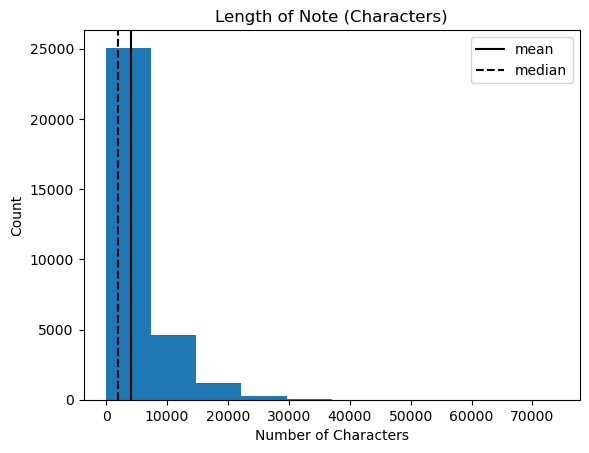

In [137]:
note_text_df_filtered['clean_note_length'] = note_text_df_filtered['clean_NoteText'].apply(lambda x: len(str(x)))
plt.figure()
plt.hist(note_text_df_filtered['clean_note_length'])
plt.title('Length of Note (Characters)')
plt.xlabel('Number of Characters')
plt.ylabel('Count')
plt.axvline(note_text_df_filtered['clean_note_length'].mean(), color = 'k', label = 'mean')
plt.axvline(note_text_df_filtered['clean_note_length'].median(), color = 'k', linestyle = '--', label = 'median')
plt.legend()
plt.savefig('./figs/clean_notes_len_char.png', transparent = True, dpi = 300, bbox_inches = "tight")
plt.show()

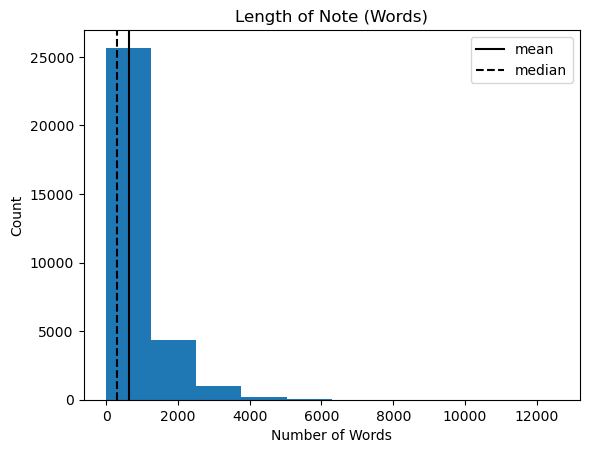

In [138]:
note_text_df_filtered['token_length'] = note_text_df_filtered['clean_NoteText'].apply(lambda x: len(x.split(' ')))
plt.figure()
plt.hist(note_text_df_filtered['token_length'])
plt.title('Length of Note (Words)')
plt.xlabel('Number of Words')
plt.ylabel('Count')
plt.axvline(note_text_df_filtered['token_length'].mean(), color = 'k', label = 'mean')
plt.axvline(note_text_df_filtered['token_length'].median(), color = 'k', linestyle = '--', label = 'median')
plt.legend()
plt.savefig('./figs/clean_notes_len_word.png', transparent = True, dpi = 300, bbox_inches = "tight")
plt.show()

In [139]:
note_text_df_filtered['DepartmentSpecialty'].value_counts()

DepartmentSpecialty
Inpatient Nursing                 30563
Obstetrics and Gynecology           246
Psychiatry                          199
Emergency Medicine                  124
Neuro-Interventional Radiology       75
Name: count, dtype: int64

In [140]:
note_text_df_filtered['ProviderType'].unique()

array(['Occupational Therapist', 'Resident', 'Physician',
       'Registered Nurse', 'Case Manager',
       'Speech and Language Pathologis', 'Athletic Trainer',
       'Nurse Practitioner', 'Nutrition Assistant', 'Physician Assistant',
       'Physical Therapist', 'Respiratory Therapist', 'Social Worker',
       'Pharmacist', 'Person', 'Licensed Vocational Nurse', 'Chaplain',
       'Registered Dietitian', 'Dietetic Intern', 'Chaplain Intern',
       'Physical Therapy Assistant', nan, 'Recreational Therapist',
       'Medical Student', 'Pharmacy Student',
       'Radiation Oncologist Therapist', 'Physical Therapy Student',
       'Midwife', 'Technologist', 'Psychologist', 'APN Student',
       'Health Care Navigator', 'Occupational Therapy Student ',
       'Nurse Anesthetist', 'Technician', 'Music Therapist',
       'Massage Therapist', 'Nursing Student', 'Child Life Specialist',
       'Interpreter', 'Counselor'], dtype=object)

In [141]:
selected_providers = ['Resident', 'Physician', 'Registered Nurse', 'Nurse Practitioner',
                      'Physician Assistant', 'Pharmacist', 'Licensed Vocational Nurse', 
                      'Medical Student', 'Pharmacy Student', 'Nursing Student', 
                      'Registered Dietitian', 'Dietetic Intern']
selected_note_text_df = note_text_df_filtered[
    note_text_df_filtered['ProviderType'].isin(selected_providers) | note_text_df_filtered['ProviderType'].isnull()
]

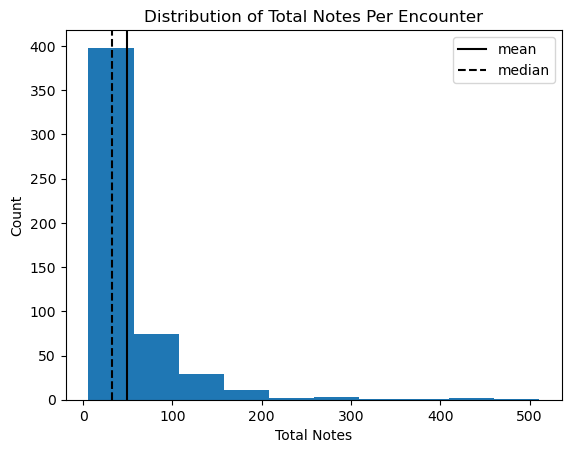

In [142]:
selected_note_dist = selected_note_text_df['EncounterKey'].value_counts()
plt.figure()
plt.hist(selected_note_dist)
plt.title('Distribution of Total Notes Per Encounter')
plt.ylabel('Count')
plt.xlabel('Total Notes')
plt.axvline(selected_note_dist.mean(), color = 'k', label = 'mean')
plt.axvline(selected_note_dist.median(), color = 'k', linestyle = '--', label = 'median')
plt.legend()
plt.savefig('./figs/selected_notes_text_dist.png', transparent = True, dpi = 300, bbox_inches = "tight")
plt.show()

Check how many notes were written after the patient has been discharged.

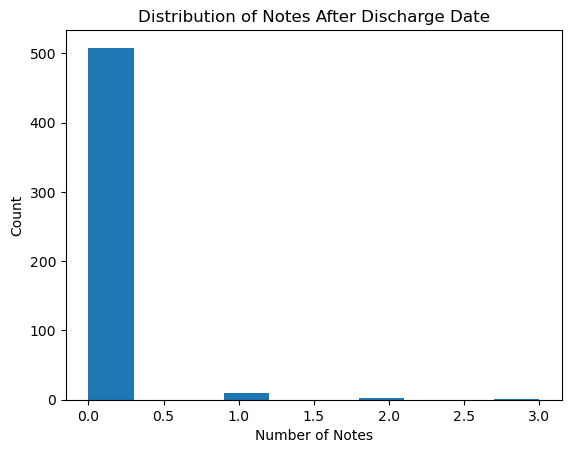

In [163]:
past_discharge_date = {}
for i in range(len(encounters_df)):
    noteText_subset = note_text_df[note_text_df['EncounterKey'] == encounters_df['EncounterKey'].loc[i]]
    note_dates = pd.to_datetime(noteText_subset['NoteDate'])
    discharge_date = pd.to_datetime(encounters_df['PtDischargeDate'].iloc[i])
    past_discharge_date[encounters_df['EncounterKey'].loc[i]] = sum(note_dates > discharge_date)

plt.figure()
plt.hist(past_discharge_date.values())
plt.title('Distribution of Notes After Discharge Date')
plt.xlabel('Number of Notes')
plt.ylabel('Count')
plt.show()
